# Proyecto final curso "Análisis de limpieza de datos" MDS UDD
## "Análisis del horno de recocido para acero"
## notebook análisis
### Estudiantes:
Pablo Elgueta  
Camilo Olavarría


## 1.- Limpieza de Datos

### 1.1.- Importación de Dataset

In [1]:
#cargar liberías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
produccion_horno_processed = pd.read_excel(f"produccion_horno_processed.xlsx")
produccion_horno_processed

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Registrado,Turn,Material,Cant. Leida,Descrip. Material,Cant. Sugerida
0,170001507,55000,-3413.3,58414,2018-01-02,2,R000211100006,2048,"Al RN 2,11 mm1010-R0 (S)",1100
1,170001507,55000,-3413.3,58414,2018-01-02,1,R000211100006,4305,"Al RN 2,11 mm1010-R0 (S)",1100
2,170001507,55000,-3413.3,58414,2018-01-02,1,R000211100006,3232,"Al RN 2,11 mm1010-R0 (S)",1100
3,170001488,55000,-9847.2,64849,2018-01-02,1,R000419060004,2450,"Al RN 4,19 mm 1006-SK (S)",1100
4,170001506,110000,-15491.3,125492,2018-01-02,2,R000124100005,6553,"Al RN 1,24 mm 1010-R0 (S)",1100
...,...,...,...,...,...,...,...,...,...,...
5885,170002367,220000,87140.9,132857,2022-08-31,1,R000180060001,8162,Al RN 1.80 mm 1006-SK (S),1100
5886,170002330,165000,-22497.2,187502,2022-08-31,3,R000124100005,9215,"Al RN 1,24 mm 1010-R0 (S)",1100
5887,170002367,220000,87140.9,132857,2022-08-31,2,R000180060001,5190,Al RN 1.80 mm 1006-SK (S),1100
5888,170002361,110000,-10895.5,120898,2022-08-31,3,R000211100006,1062,"Al RN 2,11 mm1010-R0 (S)",1100


### 1.2.- Datos Agrupados por Fecha - Producción Diaria

In [3]:
produccion_sum_per_day=produccion_horno_processed.groupby("Registrado").sum()
produccion_sum_per_day

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida
Registrado,,,,,,,
2018-01-02,1360011964,553000,-51410.7,604414,12,23366,8000
2018-01-03,1530013409,638000,-42171.0,680169,13,20284,8300
2018-01-04,1020008986,550000,-38491.2,588490,9,21109,6600
2018-01-05,1020008986,550000,-38491.2,588490,9,21640,6600
2018-01-06,510004493,275000,-19245.6,294245,3,11132,3300
...,...,...,...,...,...,...,...
2022-08-25,510007058,495000,-4765.2,499766,6,27312,3300
2022-08-26,340004734,440000,174281.8,265714,4,18634,2200
2022-08-29,340004697,385000,64643.7,320359,4,19215,2200


In [4]:
produccion_sum_per_day.index[0]

Timestamp('2018-01-02 00:00:00')

In [5]:
produccion_sum_per_day.describe()

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida
count,1.228000e+03,1.228000e+03,1228.000000,1.228000e+03,1228.000000,1228.000000,1228.000000
mean,8.154807e+08,5.994146e+05,-2182.026140,6.021368e+05,9.251629,20324.718241,5101.107492
std,4.146432e+08,3.190996e+05,59993.109164,3.195126e+05,5.179362,8286.868516,2585.411441
min,1.700015e+08,7.000000e+03,-183300.700000,6.744000e+03,1.000000,932.000000,800.000000
25%,5.100055e+08,3.300000e+05,-33895.500000,3.450630e+05,5.000000,11073.000000,3175.000000
50%,8.500077e+08,5.800000e+05,-11656.300000,5.784150e+05,9.000000,20157.500000,4700.000000
75%,1.020014e+09,8.155000e+05,14944.100000,8.065162e+05,12.000000,27927.000000,6600.000000
max,2.219018e+09,1.716000e+06,340785.500000,1.657608e+06,28.000000,47075.000000,13600.000000


In [6]:
color1='#36a7e9'
color2='#ff9f00'
color3='black'


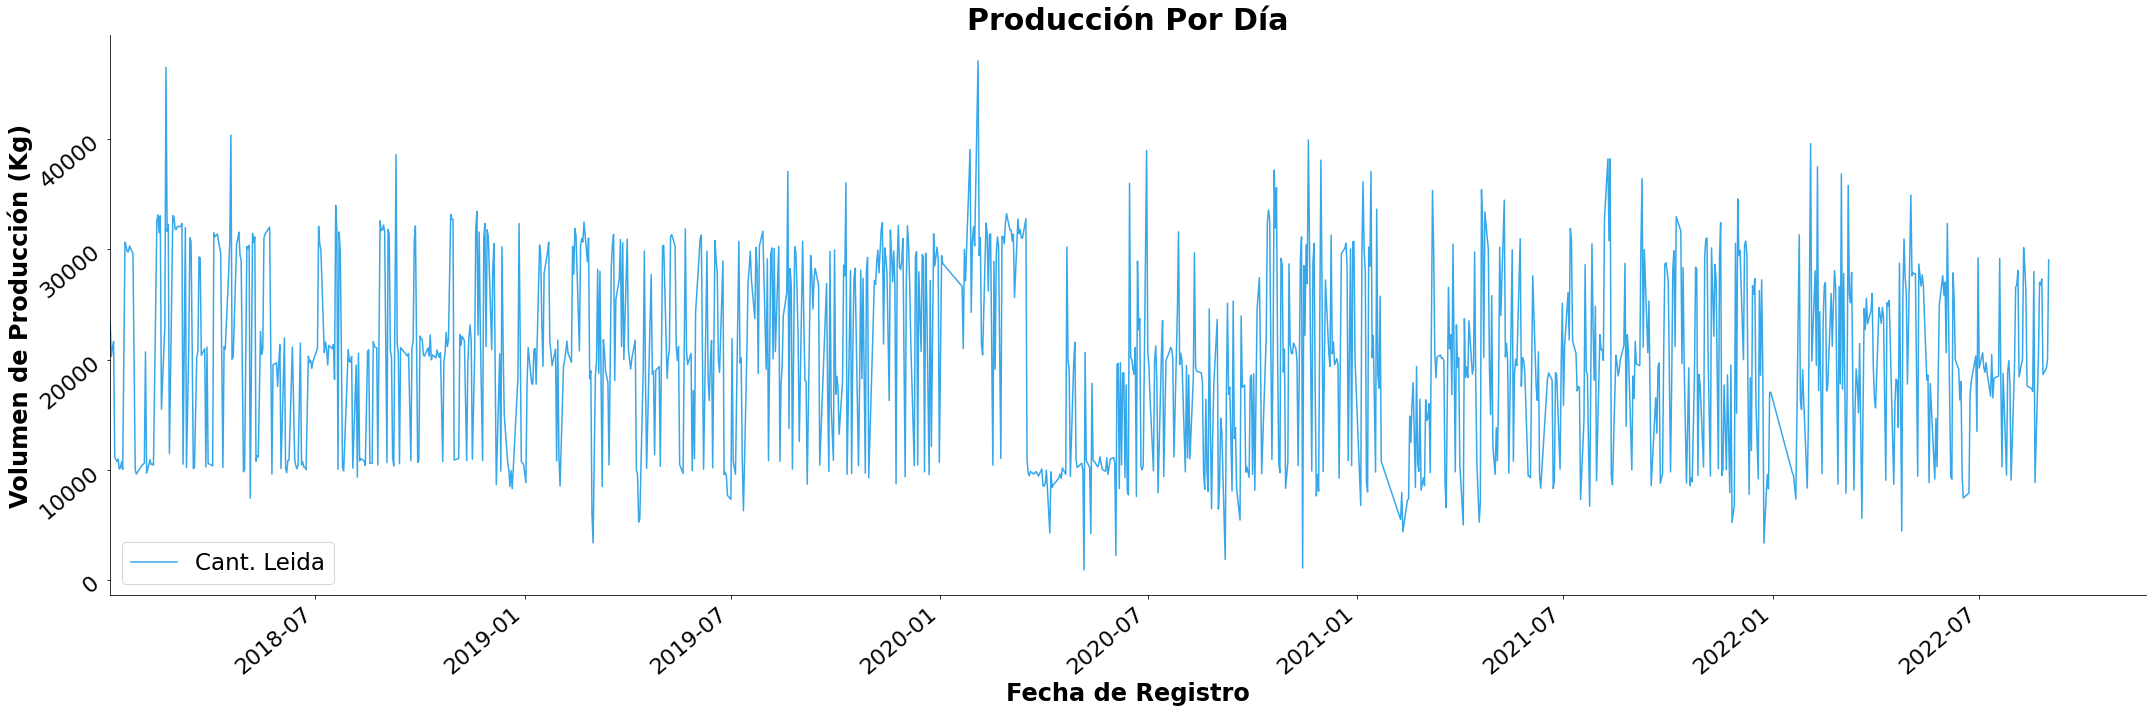

In [7]:
fig, ax = plt.subplots( figsize=(30,10))

produccion_sum_per_day['Cant. Leida'].plot(figsize=(30, 10), ax=ax, fontsize=22, color=color1)

ax.set_title("Producción Por Día", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(produccion_sum_per_day.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 23})  #ajustar leyenda
fig.tight_layout()

In [8]:
def differentiate(values, d=1):
    # First value is required so that we can recover the original values with np.cumsum
    x = np.concatenate([[values[0]], values[1:]-values[:-1]])

    if d == 1:
        return x
    else:    
        return difference(x, d - 1)

In [9]:
values = produccion_sum_per_day['Cant. Leida'].values
differences = differentiate(values)

In [10]:
asd=produccion_sum_per_day.reset_index()
asd

,Registrado,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida
0,2018-01-02,1360011964,553000,-51410.7,604414,12,23366,8000
1,2018-01-03,1530013409,638000,-42171.0,680169,13,20284,8300
2,2018-01-04,1020008986,550000,-38491.2,588490,9,21109,6600
3,2018-01-05,1020008986,550000,-38491.2,588490,9,21640,6600
4,2018-01-06,510004493,275000,-19245.6,294245,3,11132,3300
...,...,...,...,...,...,...,...,...
1223,2022-08-25,510007058,495000,-4765.2,499766,6,27312,3300
1224,2022-08-26,340004734,440000,174281.8,265714,4,18634,2200
1225,2022-08-29,340004697,385000,64643.7,320359,4,19215,2200
1226,2022-08-30,510007058,495000,53748.2,441257,7,20016,3300


Text(0, 0.5, 'Differences')

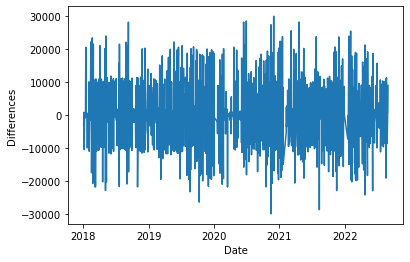

In [11]:
plt.plot(asd['Registrado'].iloc[1:], differences[1:])
plt.xlabel('Date')
plt.ylabel('Differences')

In [12]:
def ES(values, alpha= 0.05):
    N = len(values)
    S = [values[0]*alpha]
    
    for i in range(1, N):
        S.append(alpha*values[i]+(1-alpha)*S[-1])
        
    return np.array(S)

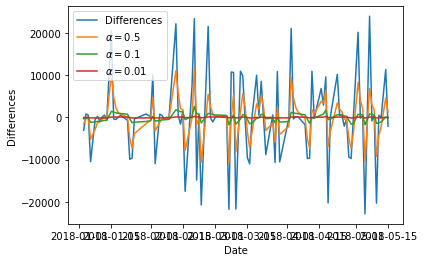

In [13]:
smooth = []
smooth.append(ES(differences[1:], 0.01))
smooth.append(ES(differences[1:], 0.1))
smooth.append(ES(differences[1:], 0.5))
plt.plot(asd['Registrado'].iloc[1:100], differences[1:100], label='Differences')
plt.plot(asd['Registrado'].iloc[1:100], smooth[2][:99], label=r'$\alpha=0.5$')
plt.plot(asd['Registrado'].iloc[1:100], smooth[1][:99], label=r'$\alpha=0.1$')
plt.plot(asd['Registrado'].iloc[1:100], smooth[0][:99], label=r'$\alpha=0.01$')
plt.xlabel('Date')
plt.ylabel('Differences')
plt.legend()

In [14]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
produccion_sum_per_day_ciclo, produccion_sum_per_day_tend = sm.tsa.filters.hpfilter(produccion_sum_per_day['Cant. Leida'])
produccion_sum_per_day['tend'] = produccion_sum_per_day_tend

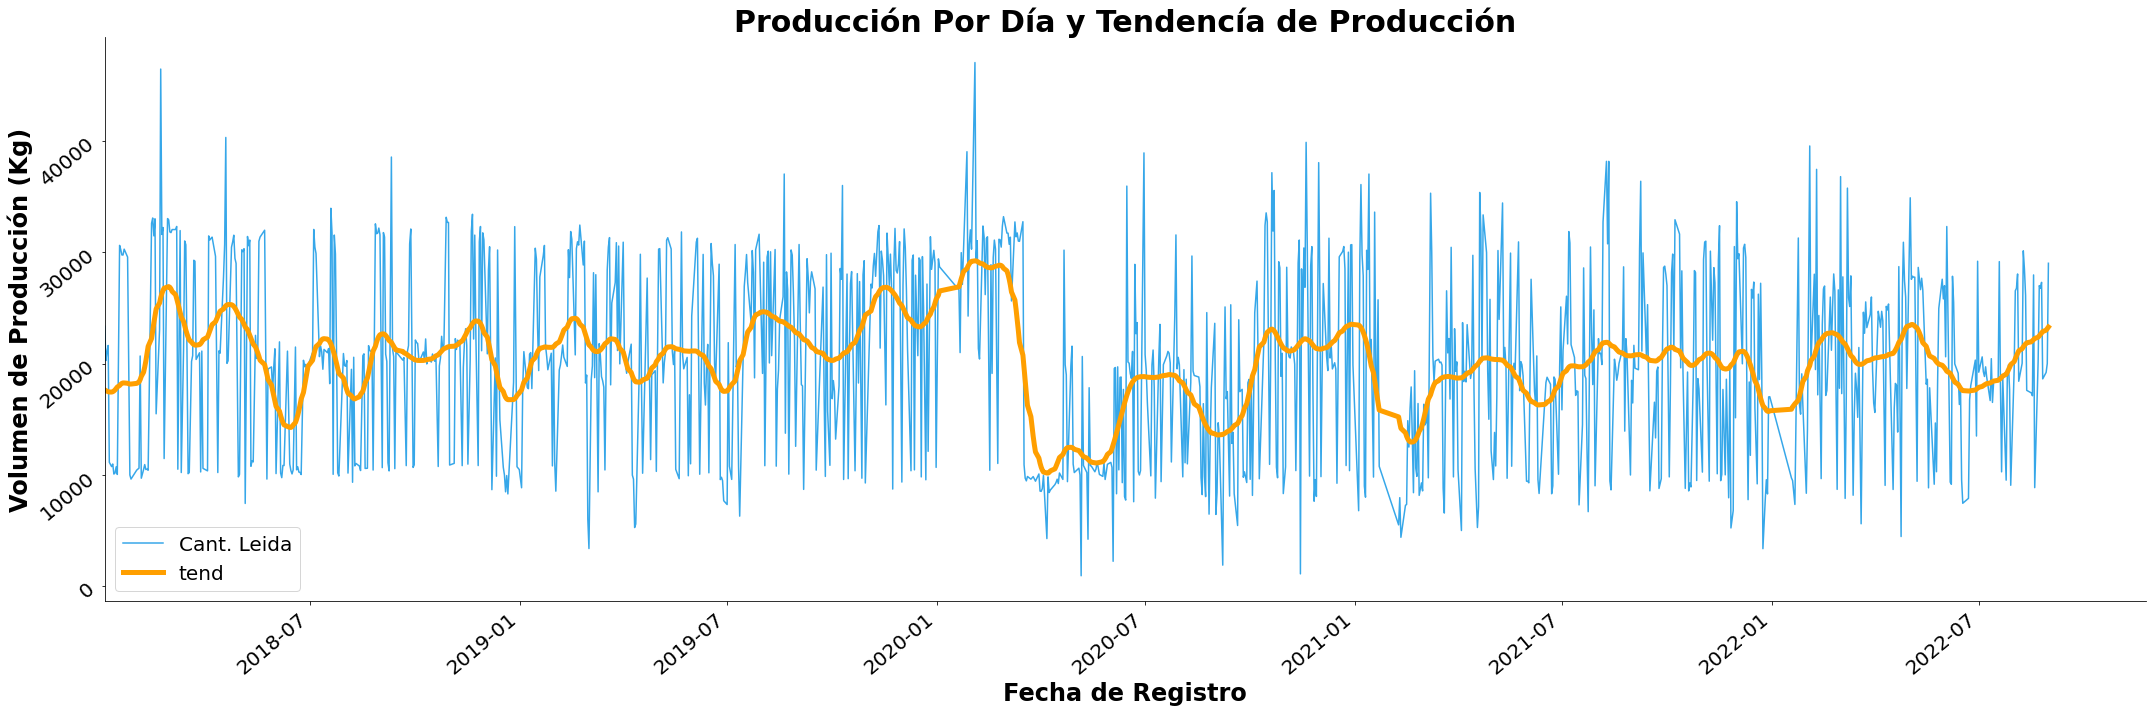

In [15]:
# graficando la variacion de la produccion real con la tendencia.
fig, ax = plt.subplots( figsize=(30,10))

produccion_sum_per_day['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax, color=color1)
produccion_sum_per_day['tend'].plot(figsize=(30, 10), fontsize=20, ax=ax, color=color2, linewidth=5.0)

ax.set_title("Producción Por Día y Tendencía de Producción", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(produccion_sum_per_day.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

### 1.3.- Agrupando Producción por Fecha - Producción Semanal

In [16]:
weekly=produccion_sum_per_day.resample('W').sum()
weekly

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida,tend
Registrado,,,,,,,,
2018-01-07,5440047838,2566000,-189809.7,2755808,46,97531,32800,87673.926332
2018-01-14,3060026972,1595000,-90459.6,1685455,18,62737,19800,105780.016446
2018-01-21,6800060103,4675000,-213148.1,4888133,80,150743,44000,90956.321557
2018-01-28,3570031593,2530000,-201802.7,2731819,32,68837,23100,72768.377266
2018-02-04,2720024075,1926000,-134095.6,2060115,20,51433,17200,74002.906417
...,...,...,...,...,...,...,...,...
2022-08-07,5270072136,3363000,-299106.0,3662103,60,119240,32800,103425.386901
2022-08-14,6460089625,3496000,-25257.0,3521265,84,122441,40100,108169.623914
2022-08-21,2550035458,1470000,34367.5,1435628,29,71327,15900,88461.722710


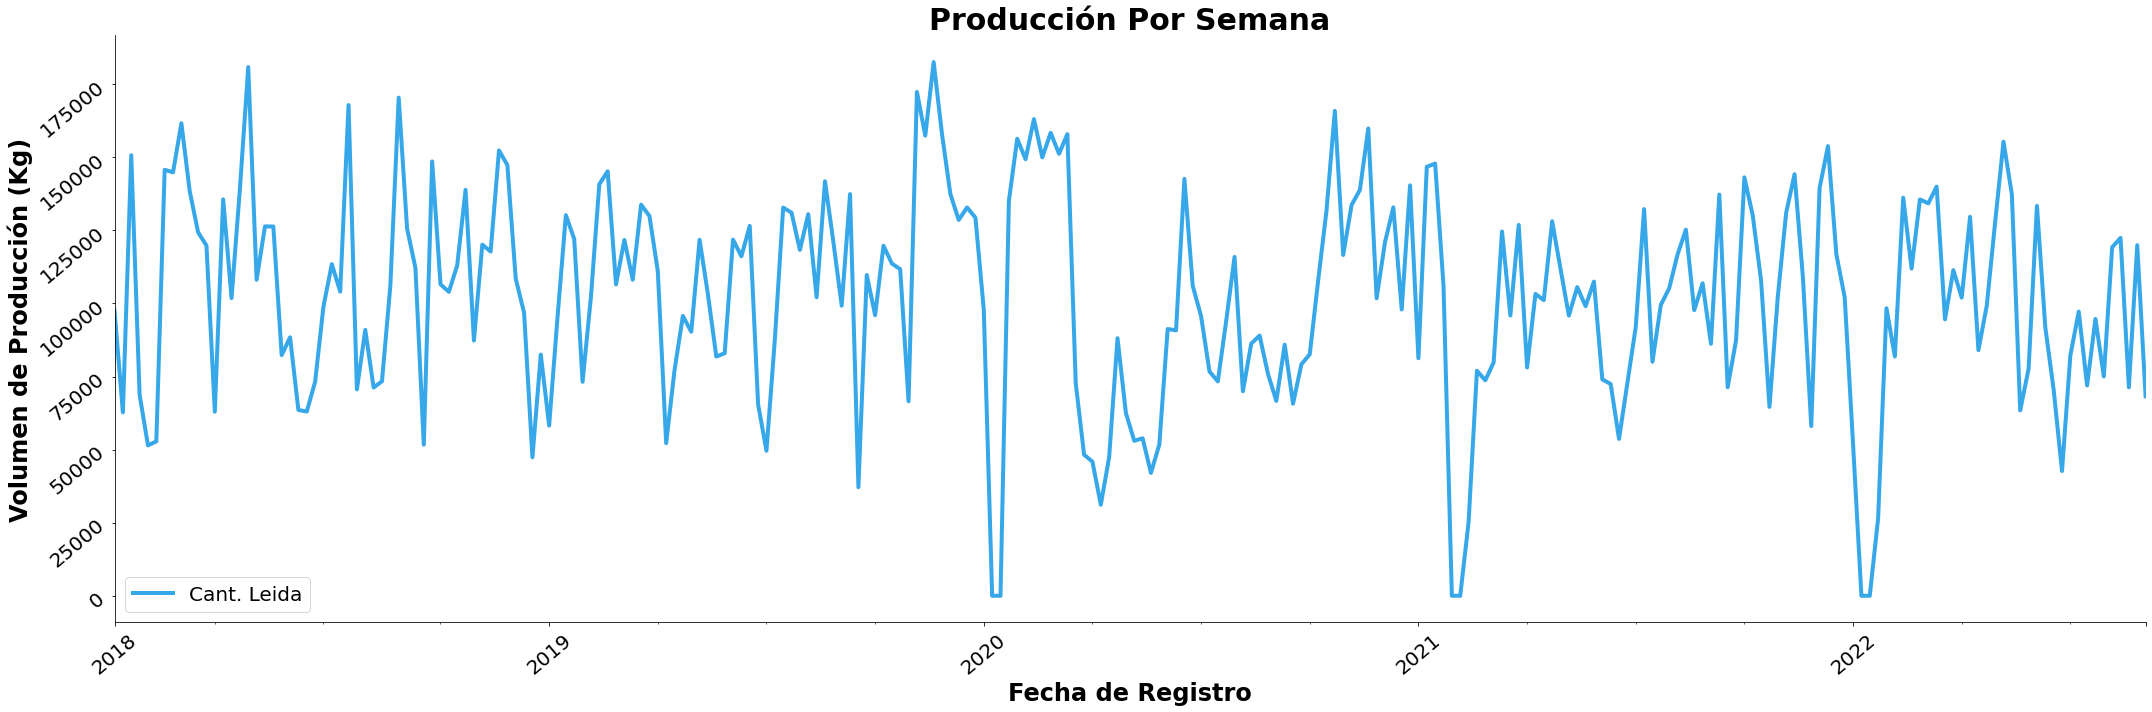

In [17]:
fig, ax = plt.subplots( figsize=(30,10))

weekly['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax, color=color1, linewidth=4.0)

ax.set_title("Producción Por Semana", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(produccion_sum_per_day.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

## 2.- Análisis de Datos

### 2.1.- Series de Tiempo

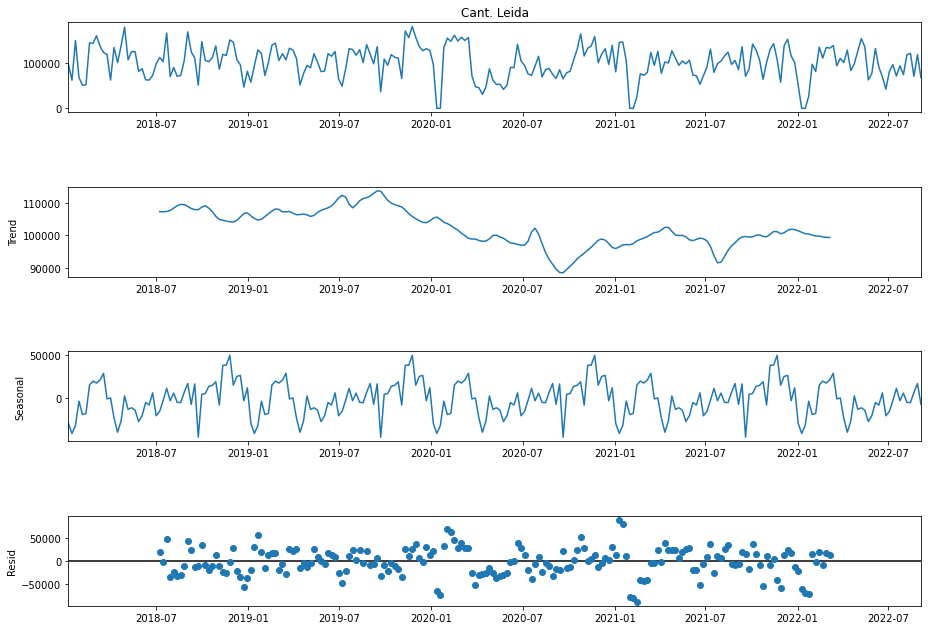

In [18]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(weekly['Cant. Leida'],
                                                  model='additive')  
fig = descomposicion.plot()
fig.set_size_inches(15, 10)
plt.show()

In [19]:
# Proporción entrenamiento y chequeo de ajuste

train_size = 0.8
split_idx = round(len(weekly)* train_size)
split_idx

# Split
train = weekly.iloc[:split_idx]
test = weekly.iloc[split_idx:]

#kws = dict(marker='o')

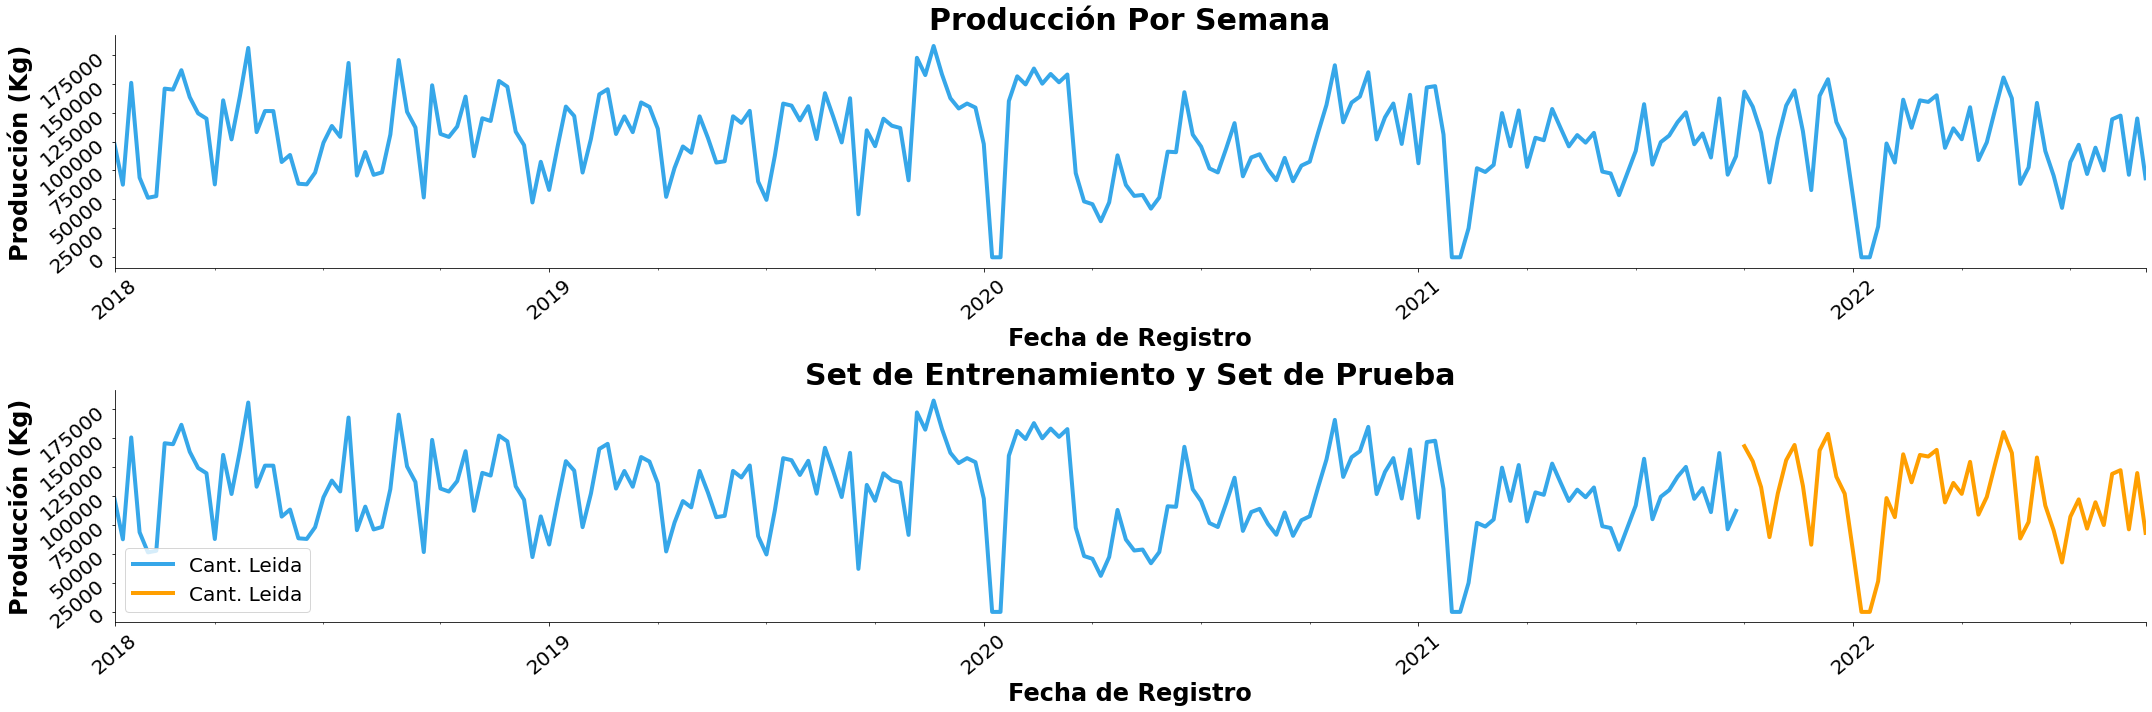

In [20]:
fig, ax = plt.subplots( 2,1, figsize=(30,10))

weekly['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[0], color=color1, linewidth=4.0)

## Grafico Produccion por Semana
ax[0].set_title("Producción Por Semana", fontsize = 30, fontweight=600 )
ax[0].set_ylabel("Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax[0].set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax[0].spines['right'].set_visible(False) #Linea derecha
ax[0].spines['top'].set_visible(False) #Linea superior
ax[0].tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

## Grafico dividido
train['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[1], color=color1, linewidth=4.0)
test['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[1], color=color2, linewidth=4.0)
#ax[1].plot(train, label='Train', **kws)
#ax[1].plot(test, label='Test', **kws)
ax[1].set_title("Set de Entrenamiento y Set de Prueba", fontsize = 30, fontweight=600 )
ax[1].set_ylabel("Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax[1].set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax[1].spines['right'].set_visible(False) #Linea derecha
ax[1].spines['top'].set_visible(False) #Linea superior
ax[1].tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes
#ax[1].get_legend().remove()

plt.xlim(produccion_sum_per_day.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda

fig.tight_layout()

In [21]:
from pmdarima.arima import auto_arima
model=auto_arima(train['Cant. Leida'], start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2299.012
Date:                Sun, 16 Oct 2022   AIC                           4604.024
Time:                        17:43:06   BIC                           4613.843
Sample:                    01-07-2018   HQIC                          4607.999
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.473e+04   5901.555      9.275      0.000    4.32e+04    6.63e+04
ar.L1          0.4682      0.055      8.445      0.000       0.360       0.577
sigma2      1.022e+09      0.085   1.21e+10      0.000    1.02e+09    1.02e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.80   Prob(JB):                         0.31
Heteroskedasticity (H):               0.71   Skew:                            -0.15
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  9e+25. Standard errors may be unstable.
"""

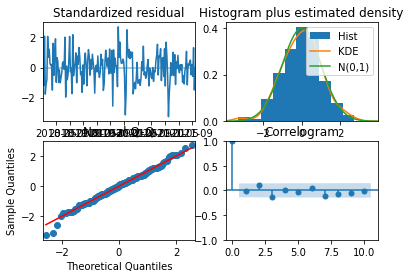

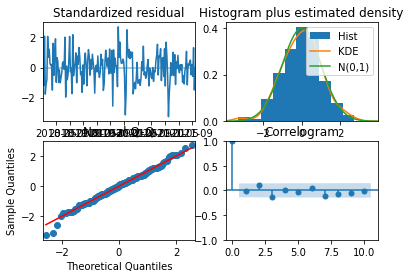

In [22]:
model.plot_diagnostics()

In [23]:
prediccion = pd.DataFrame( model.predict(n_periods=len(test['Cant. Leida'])), index=test.index )
prediccion.columns = ['Produccion Predicha']
prediccion.head()

,Produccion Predicha
Registrado,
2021-10-03,95625.552211
2021-10-10,99505.209294
2021-10-17,101321.614802
2021-10-24,102172.032481
2021-10-31,102570.187092


In [24]:
prediccion.tail()

,Produccion Predicha
Registrado,
2022-08-07,102920.706746
2022-08-14,102920.706746
2022-08-21,102920.706746
2022-08-28,102920.706746
2022-09-04,102920.706746


<function matplotlib.pyplot.show(close=None, block=None)>

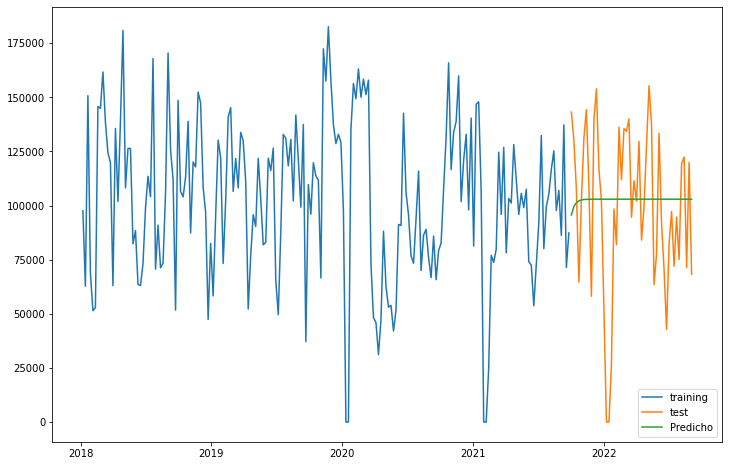

In [25]:
plt.subplots(figsize=(12,8))
plt.plot(train['Cant. Leida'], label="training")
plt.plot(test['Cant. Leida'], label="test")
plt.plot(prediccion, label="Predicho")
plt.legend(loc="lower right")
plt.show

In [26]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts, w):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=w, center=False).mean()
    roll_std = ts.rolling(window=w, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [27]:
weekly_df=weekly[['Cant. Leida']]

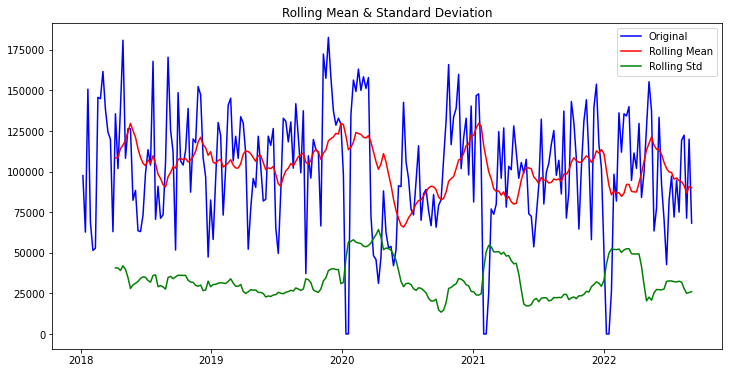


Results of Dickey-Fuller Test: 

Test Statistic                -9.268999e+00
p-value                        1.342623e-15
#Lags Used                     0.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


In [28]:
stationarity_check(weekly_df, w=14)

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose


def decomposition_plot(ts):
# Apply seasonal_decompose 
    decomposition = seasonal_decompose(ts)
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()


C:\Users\pablo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


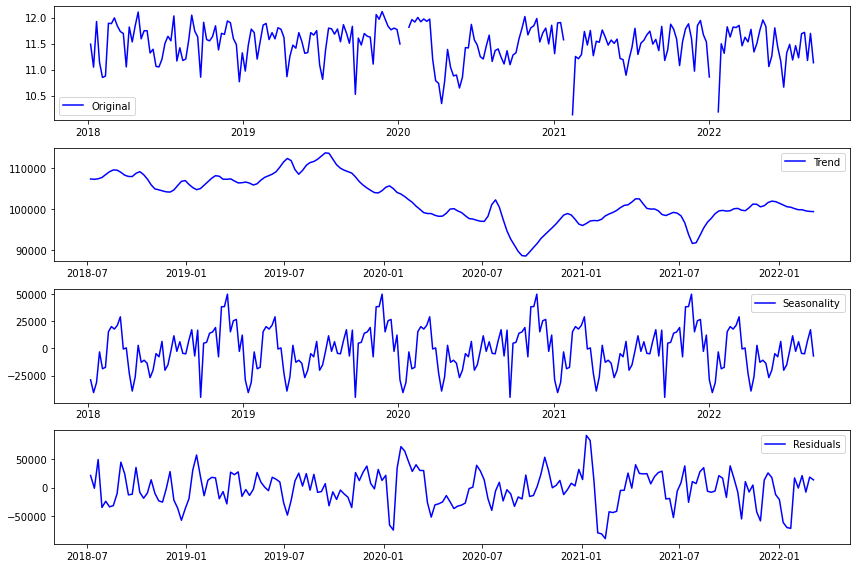

In [30]:
decomposition_plot(weekly['Cant. Leida'])

In [31]:
weekly['1 diff']= weekly['Cant. Leida']-weekly['Cant. Leida'].shift(1)
weekly

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida,tend,1 diff
Registrado,,,,,,,,,
2018-01-07,5440047838,2566000,-189809.7,2755808,46,97531,32800,87673.926332,NaN
2018-01-14,3060026972,1595000,-90459.6,1685455,18,62737,19800,105780.016446,-34794.0
2018-01-21,6800060103,4675000,-213148.1,4888133,80,150743,44000,90956.321557,88006.0
2018-01-28,3570031593,2530000,-201802.7,2731819,32,68837,23100,72768.377266,-81906.0
2018-02-04,2720024075,1926000,-134095.6,2060115,20,51433,17200,74002.906417,-17404.0
...,...,...,...,...,...,...,...,...,...
2022-08-07,5270072136,3363000,-299106.0,3662103,60,119240,32800,103425.386901,44202.0
2022-08-14,6460089625,3496000,-25257.0,3521265,84,122441,40100,108169.623914,3201.0
2022-08-21,2550035458,1470000,34367.5,1435628,29,71327,15900,88461.722710,-51114.0


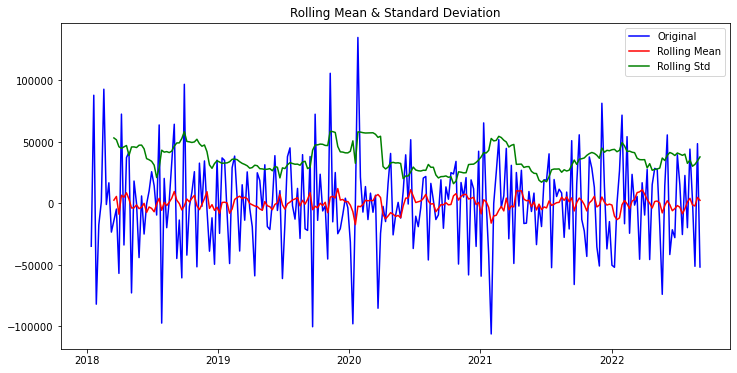


Results of Dickey-Fuller Test: 

Test Statistic                -7.174120e+00
p-value                        2.755567e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


In [32]:
A=pd.DataFrame(weekly['1 diff'])
A=A.dropna() # ya que al diferenciar se pierden observaciones
stationarity_check(A, 10)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(ts, figsize=(10,8),lags=30):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot ts
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts.dropna(), ax=ax[1], lags=lags)
    plot_pacf(ts.dropna(), ax=ax[2], lags=lags) 
    fig.tight_layout()

C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


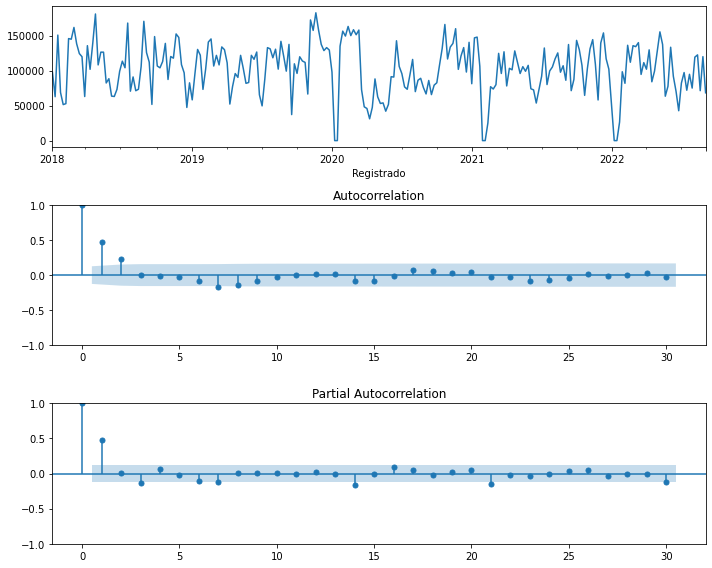

In [34]:
 plot_acf_pacf(weekly['Cant. Leida'], figsize=(10,8),lags=30)
    

## Prueba 1

Realizadas para ver que la predicción se centra en buscar el valor de la media, dejando de lado los valores propios de la estacionariedad.

In [35]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
weekly_ciclo, weekly_tend = sm.tsa.filters.hpfilter(weekly['Cant. Leida'])
weekly['tend'] = weekly_tend

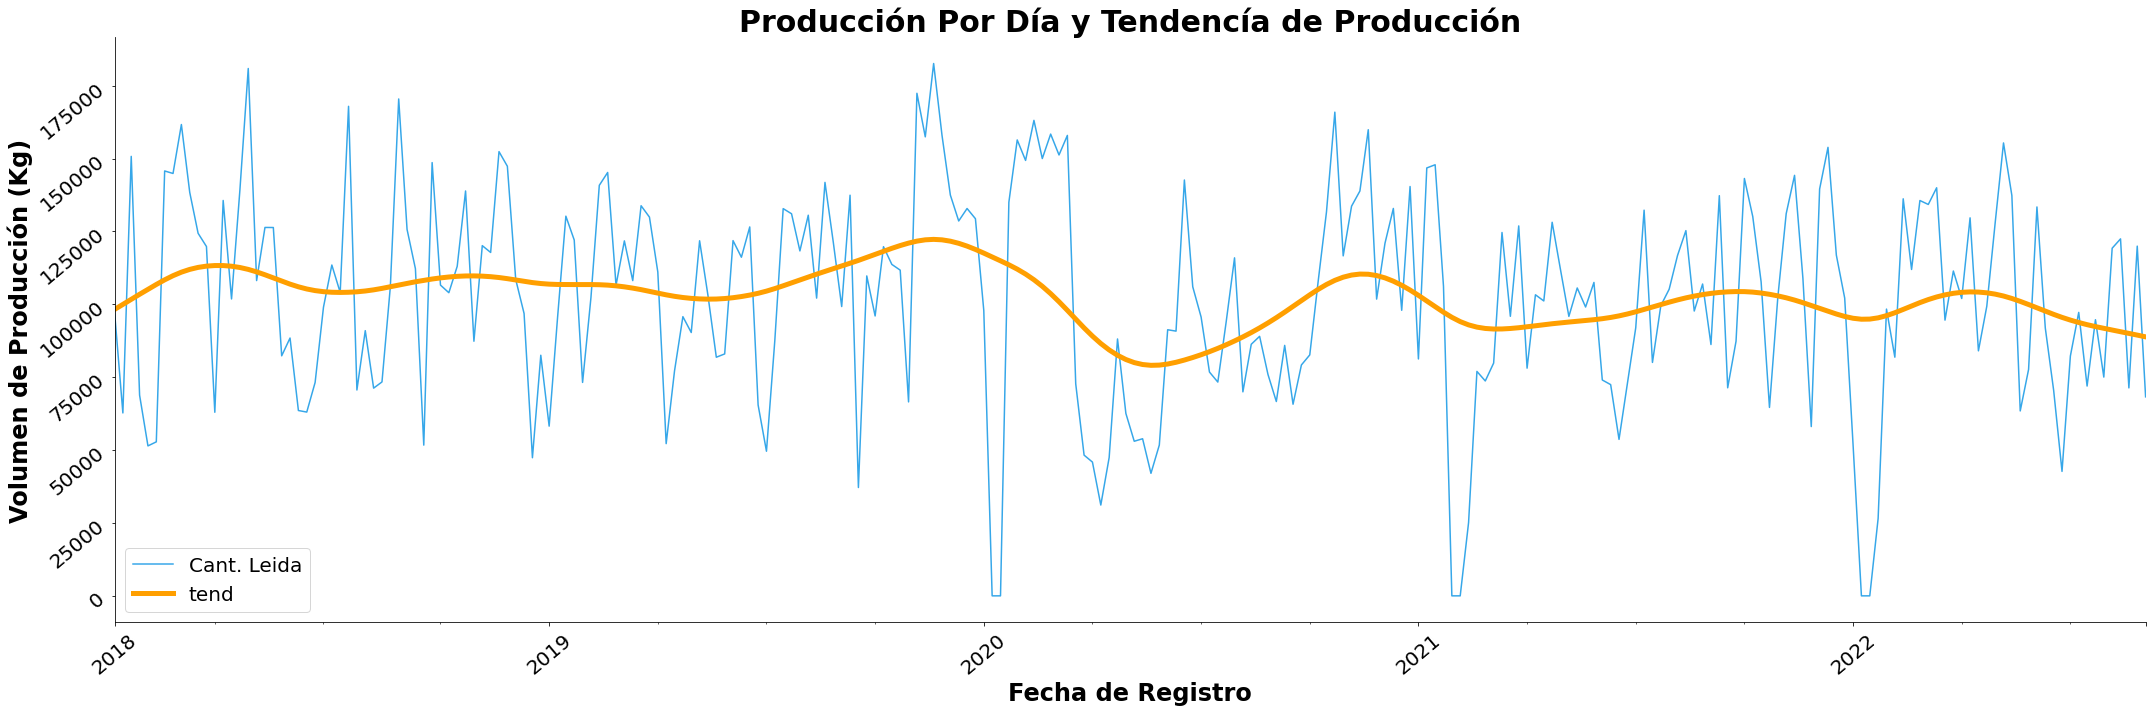

In [36]:
# graficando la variacion de la produccion real con la tendencia.
fig, ax = plt.subplots( figsize=(30,10))

weekly['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax, color=color1)
weekly['tend'].plot(figsize=(30, 10), fontsize=20, ax=ax, color=color2, linewidth=5.0)

ax.set_title("Producción Por Día y Tendencía de Producción", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(weekly.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

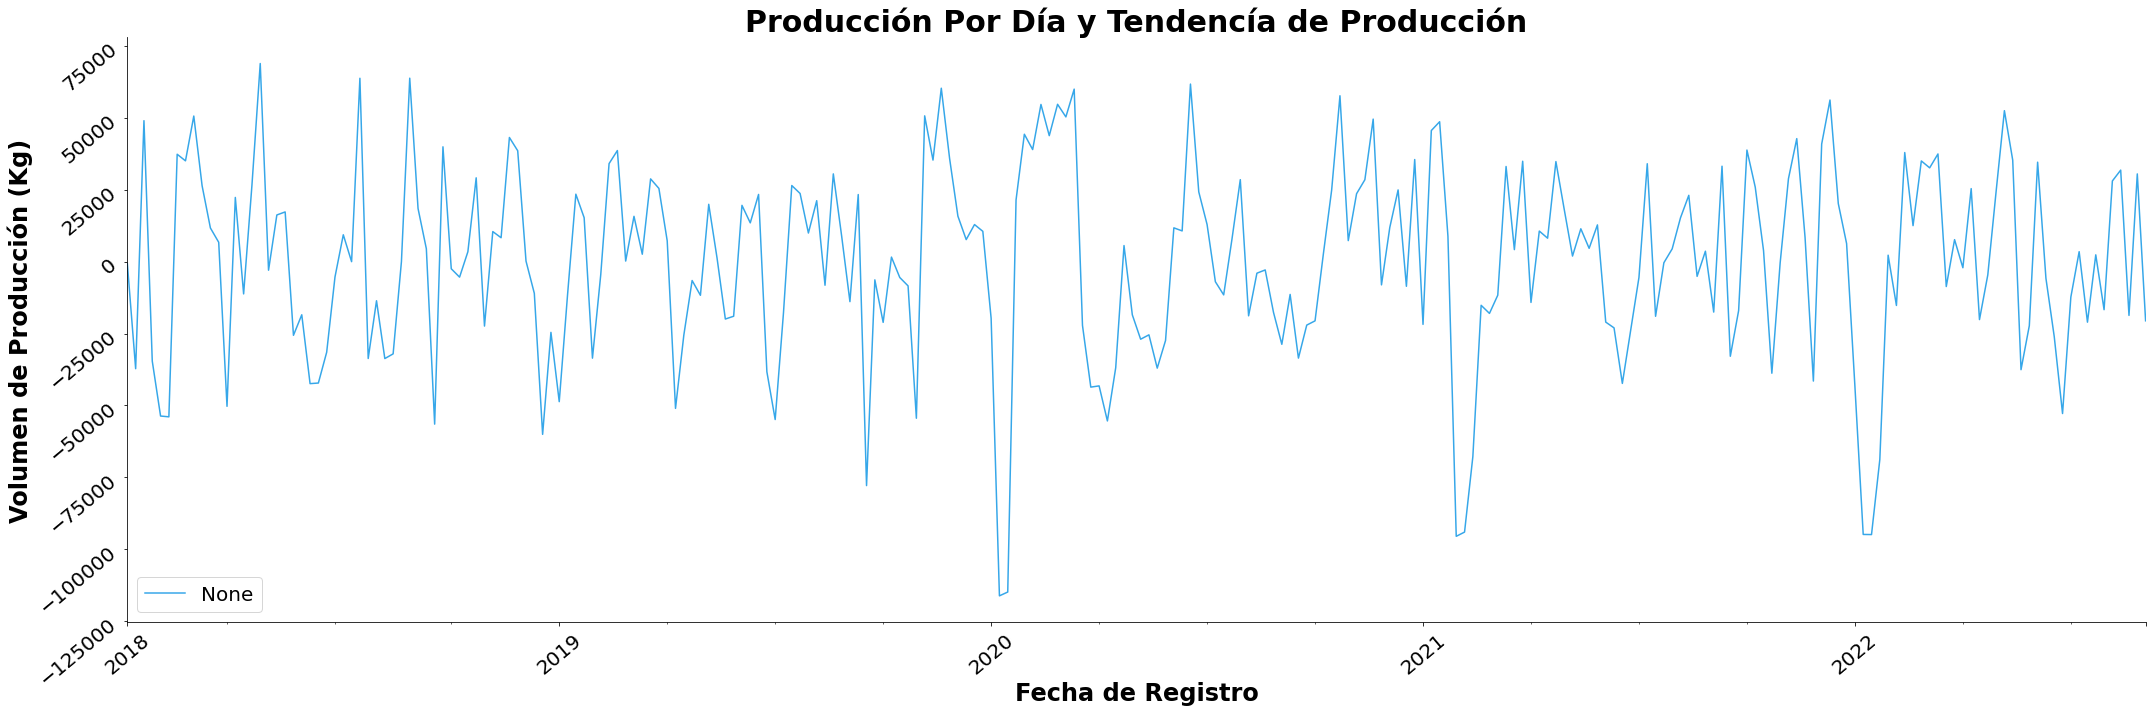

In [37]:
fig, ax = plt.subplots( figsize=(30,10))
asd=weekly['Cant. Leida']-weekly['tend']
asd.plot(figsize=(30, 10), fontsize=20, ax=ax, color=color1)


ax.set_title("Producción Por Día y Tendencía de Producción", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(weekly.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

In [38]:
# Proporción entrenamiento y chequeo de ajuste

train_size = 0.8
split_idx = round(len(asd)* train_size)
split_idx

# Split
train2 = asd.iloc[:split_idx]
test2 = asd.iloc[split_idx:]

#kws = dict(marker='o')

In [39]:
from pmdarima.arima import auto_arima
model2=auto_arima(train2, start_p=0, start_q=0)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2292.733
Date:                Sun, 16 Oct 2022   AIC                           4589.466
Time:                        17:43:14   BIC                           4596.012
Sample:                    01-07-2018   HQIC                          4592.117
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3823      0.053      7.206      0.000       0.278       0.486
sigma2      9.592e+08   2.24e-12   4.29e+20      0.000    9.59e+08    9.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.89
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               0.70   Skew:                            -0.34
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.73e+37. Standard errors may be unstable.
"""

In [40]:
prediccion2 = pd.DataFrame( model2.predict(n_periods=len(test2)), index=test2.index )
prediccion2.columns = ['Produccion Predicha']
#prediccion2.tail()

<function matplotlib.pyplot.show(close=None, block=None)>

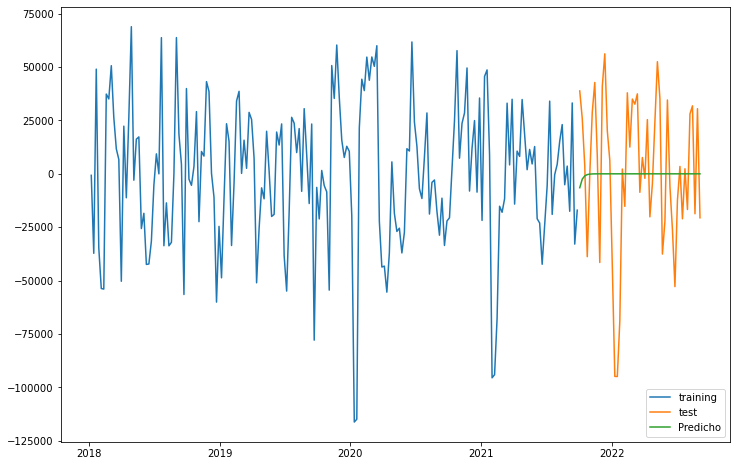

In [41]:
plt.subplots(figsize=(12,8))
plt.plot(train2, label="training")
plt.plot(test2, label="test")
plt.plot(prediccion2, label="Predicho")
plt.legend(loc="lower right")
plt.show

<AxesSubplot:xlabel='Registrado'>

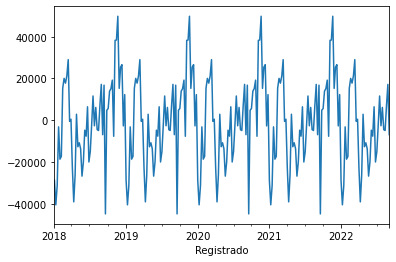

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition2 = seasonal_decompose(weekly['Cant. Leida'])
seasonal2 = decomposition2.seasonal
seasonal2.plot()

In [43]:
trend2 = decomposition2.trend

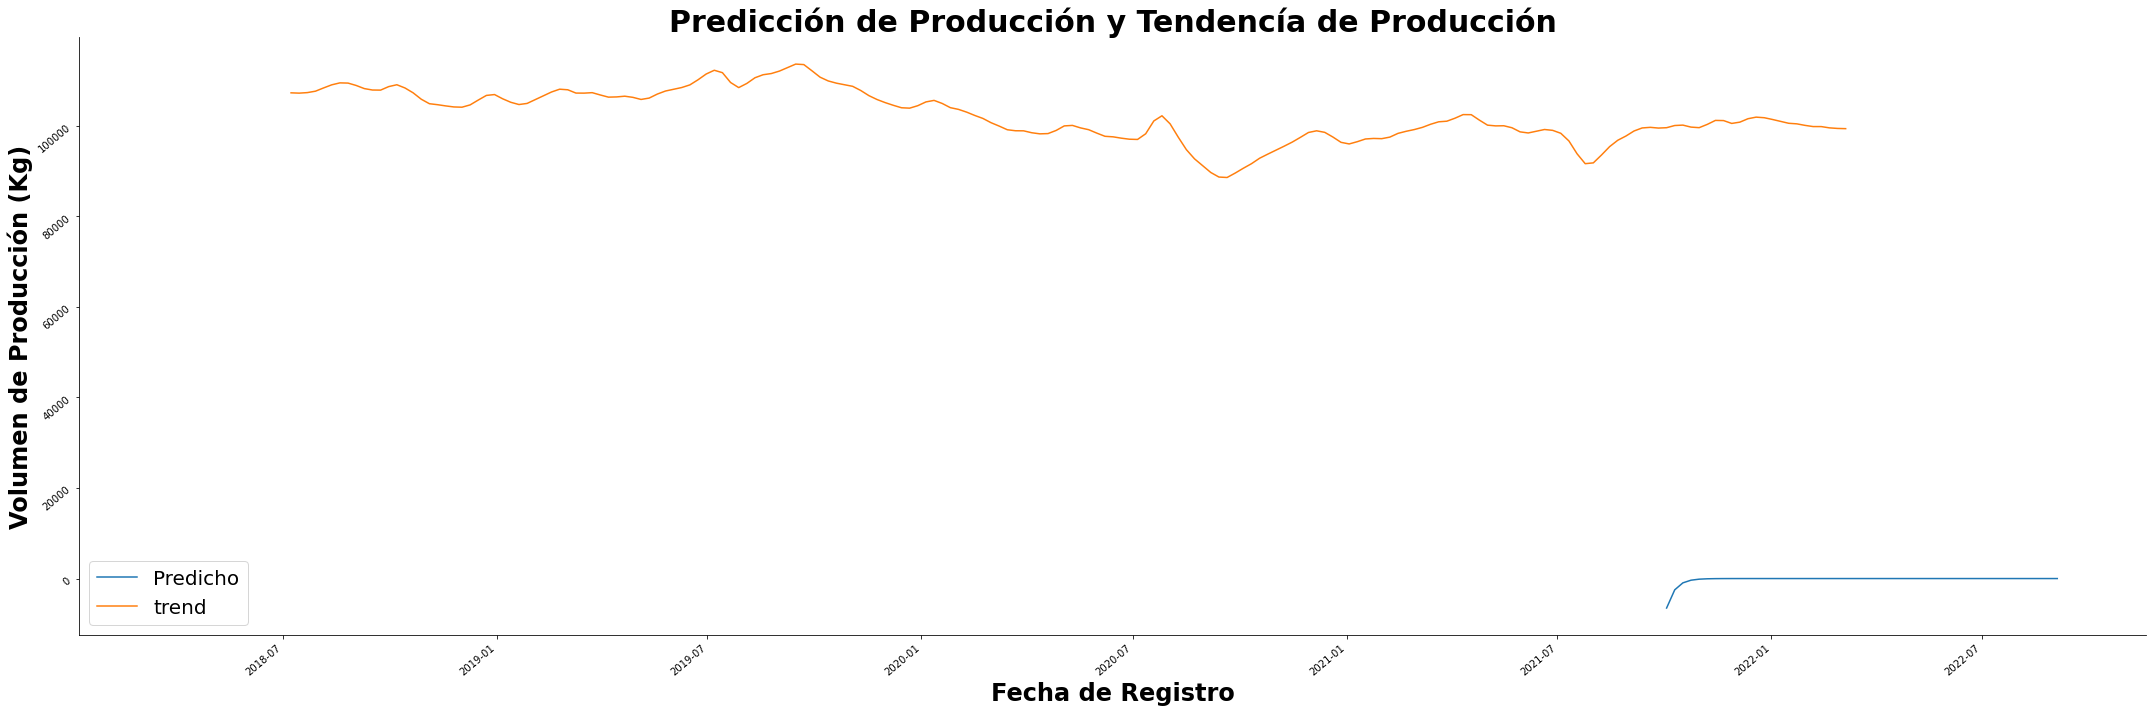

In [44]:
# graficando la variacion de la produccion real con la tendencia.
fig, ax = plt.subplots( figsize=(30,10))

plt.plot(prediccion2, label="Predicho")
plt.legend(loc="lower right")
trend2.plot()

ax.set_title("Predicción de Producción y Tendencía de Producción", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(weekly.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

## Prueba 2

En base a la tendencia se observa que la pandemia marca una anomalidad en la tendencia de producción, por lo cual se generará un set de entrenamiento a partir de junio de 2020

In [45]:
weekly.index[125]

Timestamp('2020-05-31 00:00:00', freq='W-SUN')

In [46]:
weekly_split = weekly.iloc[125:]
weekly_split

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida,tend,1 diff
Registrado,,,,,,,,,
2020-05-31,1360015552,1030000,-180372.1,1210371,8,51717,8600,79144.589920,9689.0
2020-06-07,4250048491,3030000,-448865.6,3478876,42,91272,26600,79516.985530,39555.0
2020-06-14,5780066014,3295000,-383035.2,3678050,51,90801,35300,80116.622369,-471.0
2020-06-21,6970079741,4855000,-634446.7,5489444,84,142637,43600,80879.970911,51836.0
2020-06-28,4250048848,2425000,-371165.3,2796159,49,106014,26900,81750.179371,-36623.0
...,...,...,...,...,...,...,...,...,...
2022-08-07,5270072136,3363000,-299106.0,3662103,60,119240,32800,91178.855150,44202.0
2022-08-14,6460089625,3496000,-25257.0,3521265,84,122441,40100,90609.535796,3201.0
2022-08-21,2550035458,1470000,34367.5,1435628,29,71327,15900,90028.082042,-51114.0


In [47]:
# Proporción entrenamiento y chequeo de ajuste

train_size = 0.6
split_idx = round(len(weekly_split)* train_size)
split_idx

71

In [48]:
# Split
train3 = weekly_split.iloc[:split_idx]
test3 = weekly_split.iloc[split_idx:]

#kws = dict(marker='o')

In [49]:
train3

,Orden Fab.,Cantidad OF,Saldo,Cant. Piso,Turn,Cant. Leida,Cant. Sugerida,tend,1 diff
Registrado,,,,,,,,,
2020-05-31,1360015552,1030000,-180372.1,1210371,8,51717,8600,79144.589920,9689.0
2020-06-07,4250048491,3030000,-448865.6,3478876,42,91272,26600,79516.985530,39555.0
2020-06-14,5780066014,3295000,-383035.2,3678050,51,90801,35300,80116.622369,-471.0
2020-06-21,6970079741,4855000,-634446.7,5489444,84,142637,43600,80879.970911,51836.0
2020-06-28,4250048848,2425000,-371165.3,2796159,49,106014,26900,81750.179371,-36623.0
...,...,...,...,...,...,...,...,...,...
2021-09-05,3570045922,2899000,-270695.2,3169689,35,86207,22800,103748.023636,-20749.0
2021-09-12,5100065714,4608600,-479788.8,5088362,58,137260,32600,104066.656612,51053.0
2021-09-19,3060039425,2915000,-246804.8,3161806,35,71359,19800,104271.675338,-65901.0


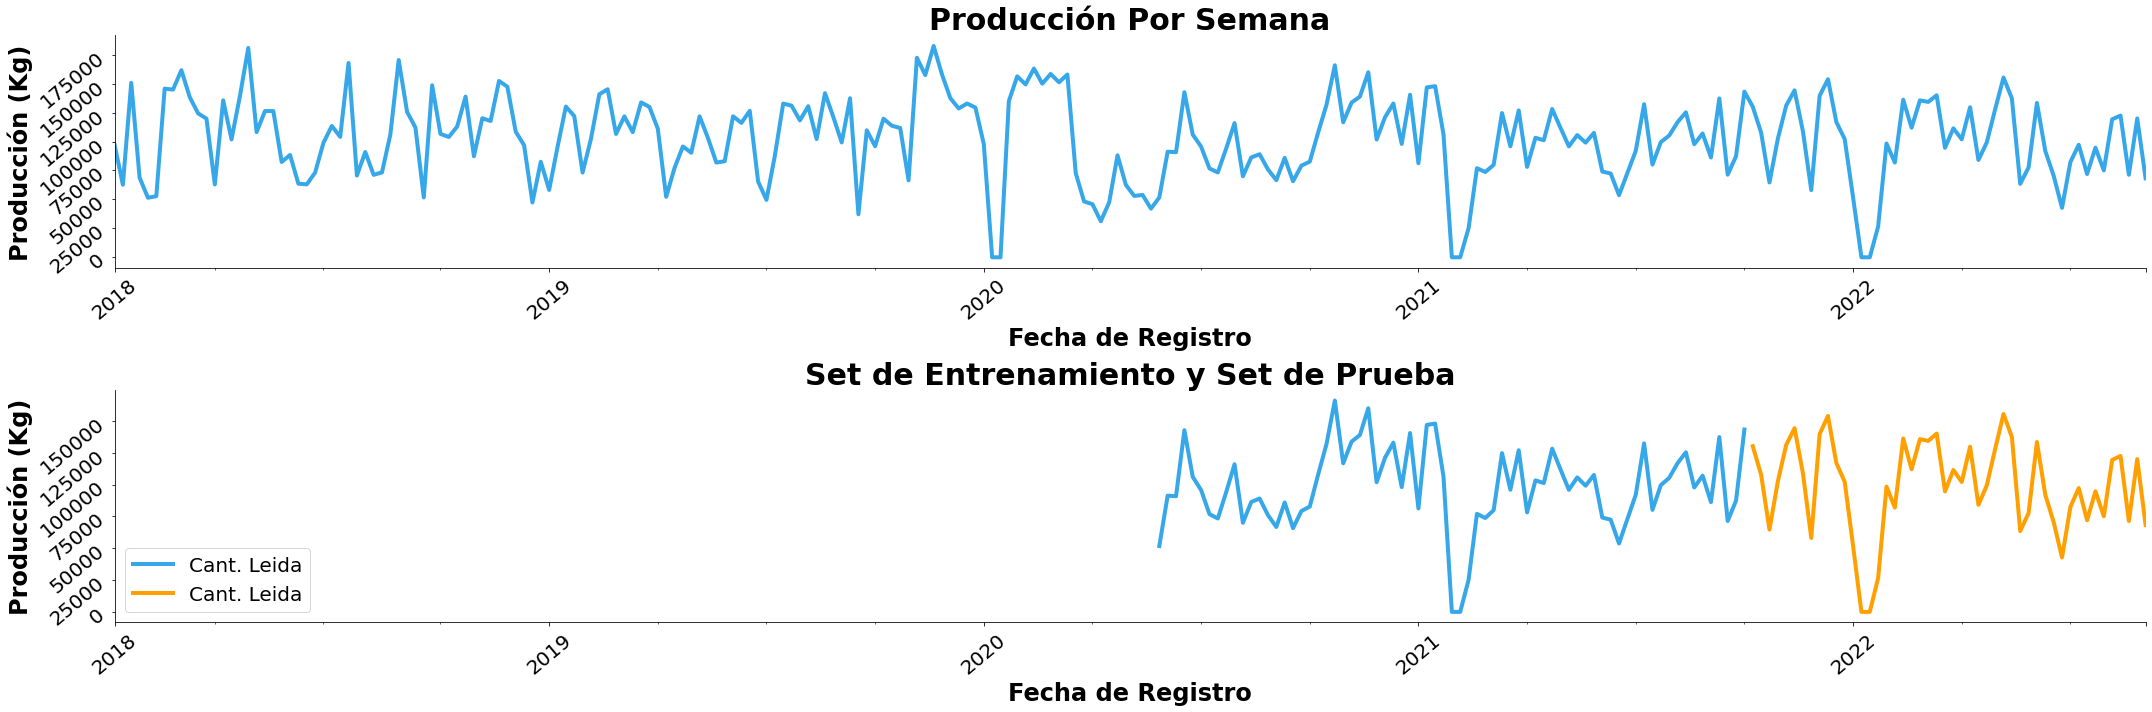

In [50]:
fig, ax = plt.subplots( 2,1, figsize=(30,10))

weekly['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[0], color=color1, linewidth=4.0)

## Grafico Produccion por Semana
ax[0].set_title("Producción Por Semana", fontsize = 30, fontweight=600 )
ax[0].set_ylabel("Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax[0].set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax[0].spines['right'].set_visible(False) #Linea derecha
ax[0].spines['top'].set_visible(False) #Linea superior
ax[0].tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

## Grafico dividido
train3['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[1], color=color1, linewidth=4.0)
test3['Cant. Leida'].plot(figsize=(30, 10), fontsize=20, ax=ax[1], color=color2, linewidth=4.0)
#ax[1].plot(train, label='Train', **kws)
#ax[1].plot(test, label='Test', **kws)
ax[1].set_title("Set de Entrenamiento y Set de Prueba", fontsize = 30, fontweight=600 )
ax[1].set_ylabel("Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax[1].set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax[1].spines['right'].set_visible(False) #Linea derecha
ax[1].spines['top'].set_visible(False) #Linea superior
ax[1].tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes
#ax[1].get_legend().remove()

plt.xlim(produccion_sum_per_day.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda

fig.tight_layout()

In [51]:
from pmdarima.arima import auto_arima
model3=auto_arima(train3['Cant. Leida'], start_p=0, start_q=0)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -828.234
Date:                Sun, 16 Oct 2022   AIC                           1662.467
Time:                        17:43:17   BIC                           1669.255
Sample:                    05-31-2020   HQIC                          1665.166
                         - 10-03-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.305e+04   1.02e+04      5.203      0.000    3.31e+04     7.3e+04
ar.L1          0.4601      0.098      4.691      0.000       0.268       0.652
sigma2      7.774e+08      0.101   7.68e+09      0.000    7.77e+08    7.77e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.54
Prob(Q):                              0.83   Prob(JB):                         0.06
Heteroskedasticity (H):               1.02   Skew:                            -0.43
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.85e+25. Standard errors may be unstable.
"""

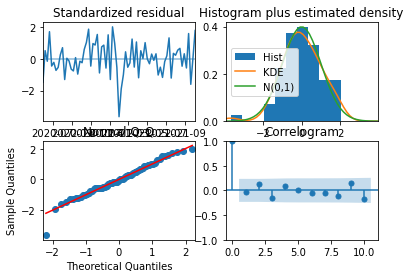

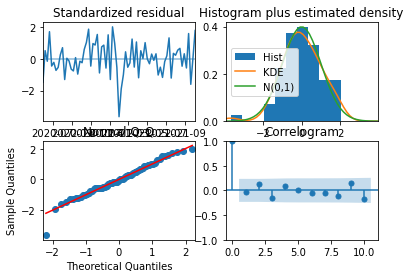

In [52]:
model3.plot_diagnostics()

In [53]:
prediccion3 = pd.DataFrame( model3.predict(n_periods=len(test3['Cant. Leida'])), index=test3.index )
prediccion3.columns = ['Produccion Predicha']
prediccion3.head()

,Produccion Predicha
Registrado,
2021-10-10,118917.082200
2021-10-17,107763.035418
2021-10-24,102631.113566
2021-10-31,100269.941660
2021-11-07,99183.578125


In [54]:
prediccion3.tail()

,Produccion Predicha
Registrado,
2022-08-07,98257.803115
2022-08-14,98257.803115
2022-08-21,98257.803115
2022-08-28,98257.803115
2022-09-04,98257.803115


<function matplotlib.pyplot.show(close=None, block=None)>

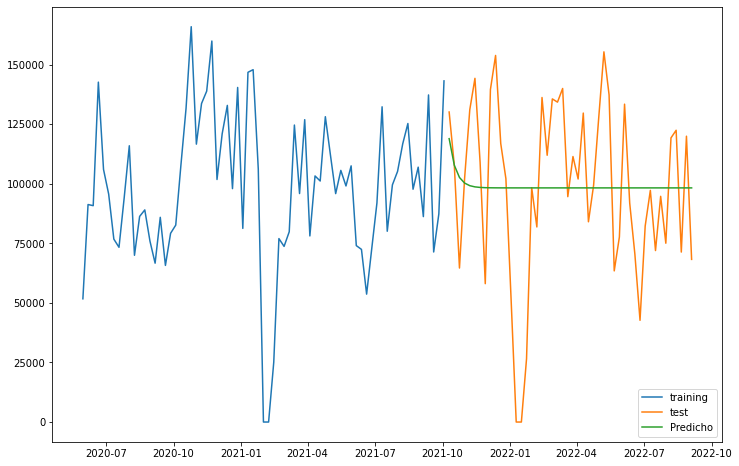

In [55]:
plt.subplots(figsize=(12,8))
plt.plot(train3['Cant. Leida'], label="training")
plt.plot(test3['Cant. Leida'], label="test")
plt.plot(prediccion3, label="Predicho")
plt.legend(loc="lower right")
plt.show

In [56]:
decomposition3 = seasonal_decompose(weekly_split['Cant. Leida'])
trend3 = decomposition3.trend


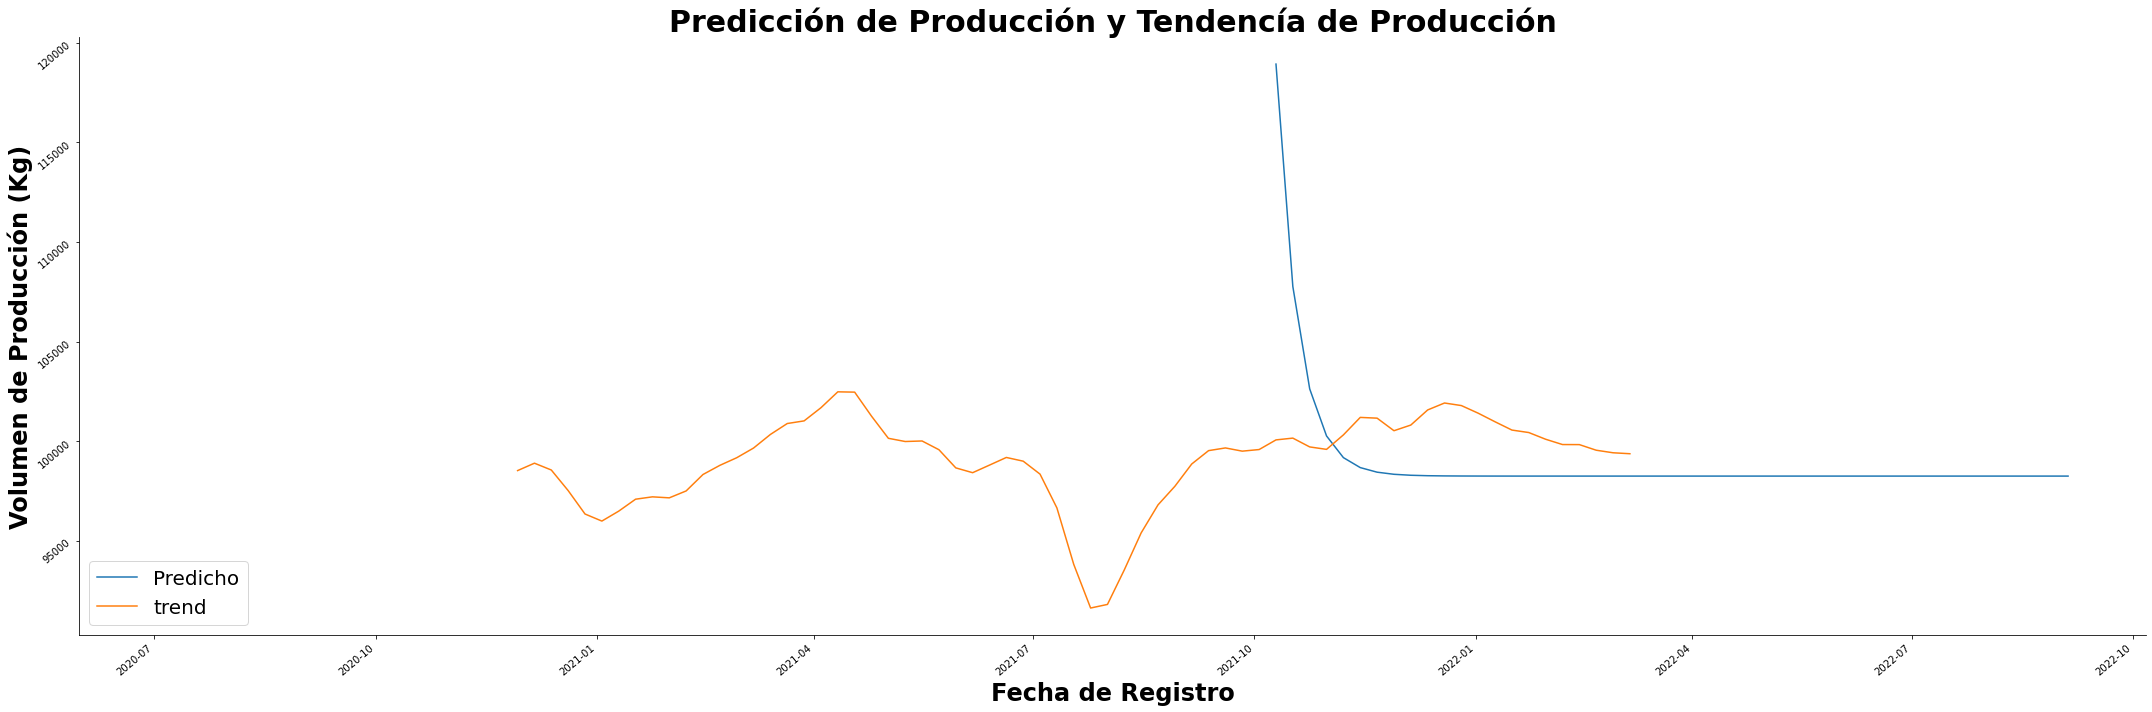

In [57]:
# graficando la variacion de la produccion real con la tendencia.
fig, ax = plt.subplots( figsize=(30,10))

plt.plot(prediccion3, label="Predicho")
plt.legend(loc="lower right")
trend3.plot()

ax.set_title("Predicción de Producción y Tendencía de Producción", fontsize = 30, fontweight=600 )
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3, fontweight=550)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, fontweight=550)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(weekly_split.index[0],) #ajustar origen eje x
#plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

# Comparación

### Modelo 1: Weekly

In [58]:
model=auto_arima(train['Cant. Leida'], start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2299.012
Date:                Sun, 16 Oct 2022   AIC                           4604.024
Time:                        17:43:21   BIC                           4613.843
Sample:                    01-07-2018   HQIC                          4607.999
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.473e+04   5901.555      9.275      0.000    4.32e+04    6.63e+04
ar.L1          0.4682      0.055      8.445      0.000       0.360       0.577
sigma2      1.022e+09      0.085   1.21e+10      0.000    1.02e+09    1.02e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.80   Prob(JB):                         0.31
Heteroskedasticity (H):               0.71   Skew:                            -0.15
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  9e+25. Standard errors may be unstable.
"""

### Modelo 3: Weekly desde junio 2020

In [59]:
model3=auto_arima(train3['Cant. Leida'], start_p=0, start_q=0)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -828.234
Date:                Sun, 16 Oct 2022   AIC                           1662.467
Time:                        17:43:21   BIC                           1669.255
Sample:                    05-31-2020   HQIC                          1665.166
                         - 10-03-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.305e+04   1.02e+04      5.203      0.000    3.31e+04     7.3e+04
ar.L1          0.4601      0.098      4.691      0.000       0.268       0.652
sigma2      7.774e+08      0.101   7.68e+09      0.000    7.77e+08    7.77e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.54
Prob(Q):                              0.83   Prob(JB):                         0.06
Heteroskedasticity (H):               1.02   Skew:                            -0.43
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.85e+25. Standard errors may be unstable.
"""

#### Extracto de Contenido en Clases
Generalmente, la eleccion de modelos y la longitud de sus rezagos se hace mediante AIC o BIC.

AIC (Akaike Information Criterion)
$$ BIC(p) = log\left( \frac{SSR(p)}{T} \right) + (p + 1) \frac{log(T)}{T}$$

 * Menor AIC indica un mejor modelo
  
BIC (Bayesian Information Criterion)

$$ AIC(p) = log\left( \frac{SSR(p)}{T} \right) + (p + 1) \frac{2}{T}$$

  * Muy similar a AIC
  * Menor BIC indicates a better model

AIC vs BIC
La diferencia entre ambos, es como penalizan la complejidad del modelo.
BIC favorece modelos más simples que AIC.
Generalmente, AIC se prefiere para modelos predictivos y BIC para explicativos.